# Feature Detection and Analysis Overview

This notebook provides an overview of various feature detection and analysis techniques in OpenCV. Feature detection is crucial for tasks like object recognition, tracking, image registration, and more advanced computer vision applications.
> https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

### Table of Contents

- [Introduction](#Introduction)
- [1. Geometric Transformations (Rotation)](#1.-Geometric-Transformations-(Rotation))
- [2. Edge and Corner Detection (Canny)](#2.-Edge-and-Corner-Detection-(Canny))
- [3. Contour Analysis (Convexity Defects)](#3.-Contour-Analysis-(Convexity-Defects))
- [4. Hough Transforms (Circles)](#4.-Hough-Transforms-(Circles))
- [5. Object Isolation by Color](#5.-Object-Isolation-by-Color)

### Introduction

Features are unique patterns or structures in an image that can be reliably detected and used for various computer vision tasks. This directory's examples explore different methods to find, describe, and analyze these features.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)

In [12]:
root = os.getcwd()
imagePath = os.path.join(root,'..' ,'_assets')

## 1. Geometric [Transformations](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html) (Rotation)

OpenCV provides two transformation functions, [cv.warpAffine](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) and [cv.warpPerspective](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87), with which you can perform all kinds of transformations. [cv.warpAffine](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) takes a 2x3 transformation matrix while [cv.warpPerspective](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) takes a 3x3 transformation matrix as input. _[cv2.getRotationMatrix2D](https://www.geeksforgeeks.org/computer-vision/python-opencv-getrotationmatrix2d-function/)_

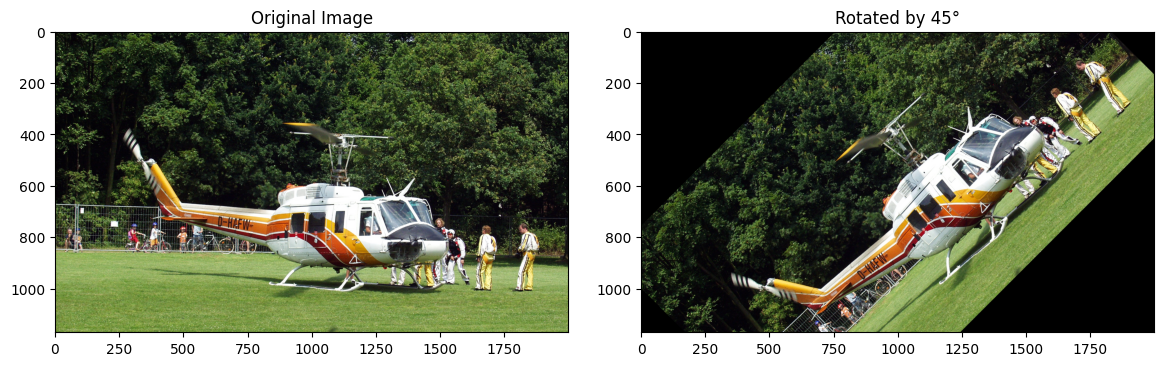

In [7]:
img_path_helicopter = os.path.join(imagePath, "helicopter.jpg")
image = cv2.imread(img_path_helicopter)

if image is not None:
    (rows, cols) = image.shape[:2]
    center_point = (cols / 2, rows / 2)
    rotation_angle = 45

    rotation_matrix = cv2.getRotationMatrix2D(center_point, rotation_angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(12, 9))

    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")

    axes[1].imshow(rotated_image_rgb)
    axes[1].set_title(f"Rotated by {rotation_angle}°")

    plt.tight_layout(pad=2.0)
    plt.show()

else:
    print(f"Error: Could not load image from {img_path_helicopter}")


**Full Script:** For more details including translation, see [`examples/03_rotation.py`](examples/03_rotation.py) and [`examples/02_affine_translation.py`](examples/02_affine_translation.py).

## 2. Edge and [Corner Detection](https://opencv.org/blog/edge-detection-using-opencv/) (Canny)

Edges and corners are fundamental image features that often indicate object boundaries or points of interest.

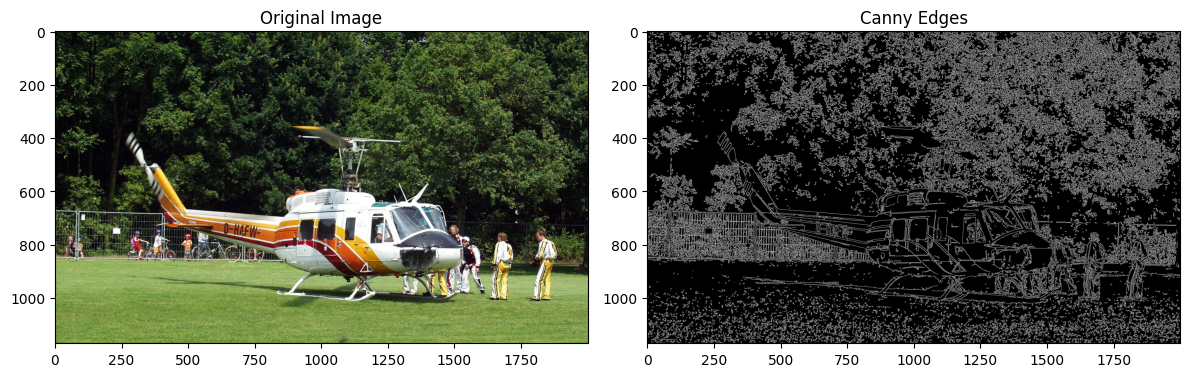

In [8]:
img_path_helicopter = os.path.join(imagePath, "helicopter.jpg")
image = cv2.imread(img_path_helicopter)

if image is not None:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(12, 9))

    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")

    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title("Canny Edges")
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Error: Could not load image from {img_path_helicopter}")

**Full Script:** For real-time Canny edge detection, see [`examples/04_canny_edge_detection.py`](examples/04_canny_edge_detection.py). For Shi-Tomasi corners, see [`examples/05_corner_detection.py`](examples/05_corner_detection.py).

## 3. Contour Analysis ([Convexity Defects](https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html))

Contour analysis is crucial for object shape understanding. Here, we demonstrate **Convexity Defects**.

No convexity defects found.


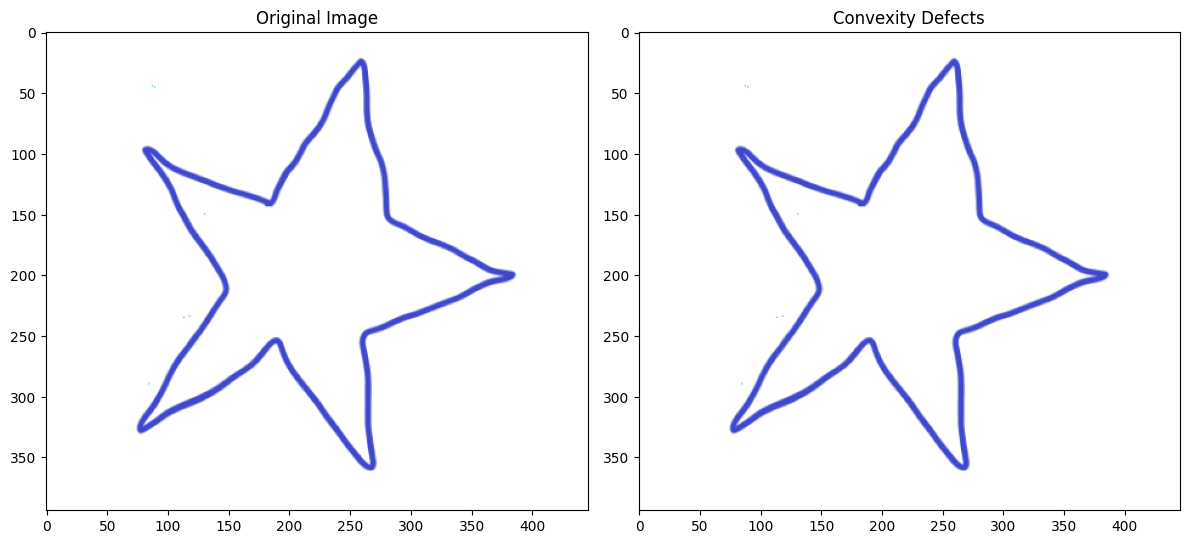

In [10]:
img_path_star = os.path.join(imagePath, "star.png")
image = cv2.imread(img_path_star)

if image is not None:
    # orijinali sakla
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    contours, hierarchy = cv2.findContours(binary_image,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        main_contour = max(contours, key=cv2.contourArea)

        hull_indices = cv2.convexHull(main_contour, returnPoints=False)
        defects = cv2.convexityDefects(main_contour, hull_indices)

        processed = image.copy()

        if defects is not None and defects.shape[0] > 0:
            for i in range(defects.shape[0]):
                s_idx, e_idx, f_idx, depth = defects[i, 0]
                start_point = tuple(main_contour[s_idx][0])
                end_point = tuple(main_contour[e_idx][0])
                far_point = tuple(main_contour[f_idx][0])

                cv2.line(processed, start_point, end_point, (0, 255, 0), 2)
                cv2.circle(processed, far_point, 5, (0, 0, 255), -1)
        else:
            print("No convexity defects found.")

        processed_rgb = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(original_rgb)
        axes[0].set_title("Original Image")

        axes[1].imshow(processed_rgb)
        axes[1].set_title("Convexity Defects")

        plt.tight_layout()
        plt.show()
    else:
        print("No contours found.")
else:
    print(f"Error: Could not load image from {img_path_star}")

**Full Script:** For more on contour analysis, see [`examples/09_convexity_defects.py`](examples/09_convexity_defects.py) and other contour-related scripts in the `examples/` folder.

## 4. Hough Transforms (Circles)

Hough Transforms are powerful for detecting parameterized shapes. Here, we demonstrate **Circle Detection**.

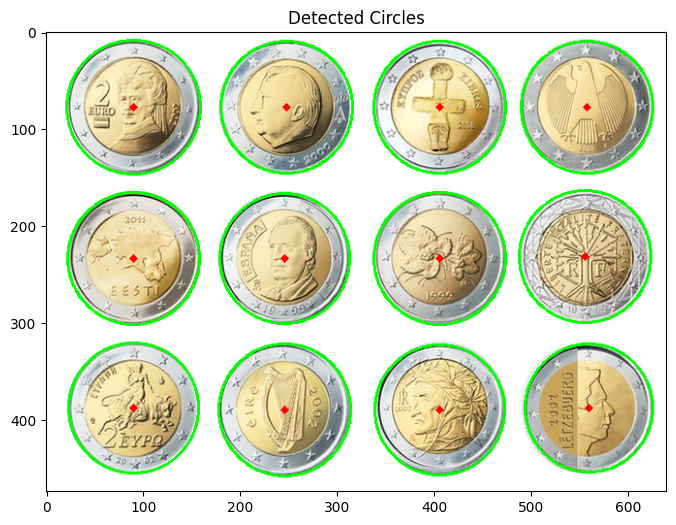

In [13]:
img_path = os.path.join(imagePath, "coins.jpg")
image = cv2.imread(img_path)

if image is not None:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_blurred = cv2.medianBlur(gray, 5)

    circles = cv2.HoughCircles(
        image=gray_blurred,
        method=cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=200,
        param2=30,
        minRadius=40,
        maxRadius=80
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center_x, center_y, radius = i[0], i[1], i[2]
            cv2.circle(image, (center_x, center_y), radius, (0, 255, 0), 2)
            cv2.circle(image, (center_x, center_y), 2, (0, 0, 255), 3)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title("Detected Circles")

    plt.show()
else:
    print(f"Error: Could not load image from {img_path}")

**Full Script:** For Hough line detection, see [`examples/12_hough_circles.py`](examples/12_hough_circles.py) and related scripts.

## 5. Object Isolation by Color

A practical technique to segment (isolate) objects based on their color in images or video streams.

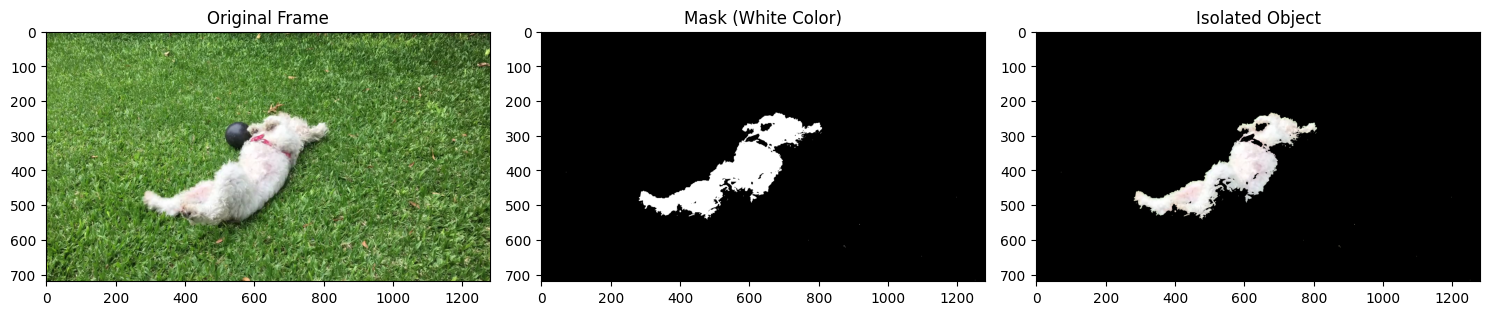

In [14]:
video_path = os.path.join(imagePath, "dog.mp4")
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    ret, frame = cap.read()
    cap.release()
else:
    ret = False
    print(f"Error: Could not load video from {video_path}")

if ret and frame is not None:
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_white = np.array([0, 0, 200], dtype=np.uint8)
    upper_white = np.array([179, 40, 255], dtype=np.uint8)

    mask = cv2.inRange(hsv, lower_white, upper_white)
    result = cv2.bitwise_and(frame, frame, mask=mask)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(frame_rgb)
    axes[0].set_title("Original Frame")

    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Mask (White Color)")

    axes[2].imshow(result_rgb)
    axes[2].set_title("Isolated Object")

    plt.tight_layout()
    plt.show()
else:
    print("Could not process frame for color isolation.")

**Full Script:** For real-time color isolation in video, see [`examples/13_object_isolation_by_color.py`](examples/13_object_isolation_by_color.py).